# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [5]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

/home/anand/store/git/anandsaha/cs231n.assignments/2016winter/assignment1/cs231n/features.py:118: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  orientation_histogram[:,:,i] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy].T


Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [10]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e3, 1e4, 1e5, 1e6, 1e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=rs,
                              num_iters=5000, verbose=False)
        
        p_val = svm.predict(X_val_feats)
        val_acc = np.mean(y_val == p_val)
        
        p_train = svm.predict(X_train_feats)
        train_acc = np.mean(y_train == p_train)
        
        results[(lr, rs)] = (train_acc, val_acc)
        if val_acc > best_val:
            best_val = val_acc
            best_svm = svm

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-09 reg 1.000000e+03 train accuracy: 0.102122 val accuracy: 0.107000
lr 1.000000e-09 reg 1.000000e+04 train accuracy: 0.080694 val accuracy: 0.077000
lr 1.000000e-09 reg 1.000000e+05 train accuracy: 0.090694 val accuracy: 0.096000
lr 1.000000e-09 reg 1.000000e+06 train accuracy: 0.108286 val accuracy: 0.118000
lr 1.000000e-09 reg 1.000000e+07 train accuracy: 0.418265 val accuracy: 0.427000
lr 1.000000e-08 reg 1.000000e+03 train accuracy: 0.091694 val accuracy: 0.094000
lr 1.000000e-08 reg 1.000000e+04 train accuracy: 0.090388 val accuracy: 0.081000
lr 1.000000e-08 reg 1.000000e+05 train accuracy: 0.270673 val accuracy: 0.295000
lr 1.000000e-08 reg 1.000000e+06 train accuracy: 0.416102 val accuracy: 0.417000
lr 1.000000e-08 reg 1.000000e+07 train accuracy: 0.402878 val accuracy: 0.394000
lr 1.000000e-07 reg 1.000000e+03 train accuracy: 0.153367 val accuracy: 0.146000
lr 1.000000e-07 reg 1.000000e+04 train accuracy: 0.409714 val accuracy: 0.418000
lr 1.000000e-07 reg 1.000000

In [11]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print (test_accuracy)

0.426


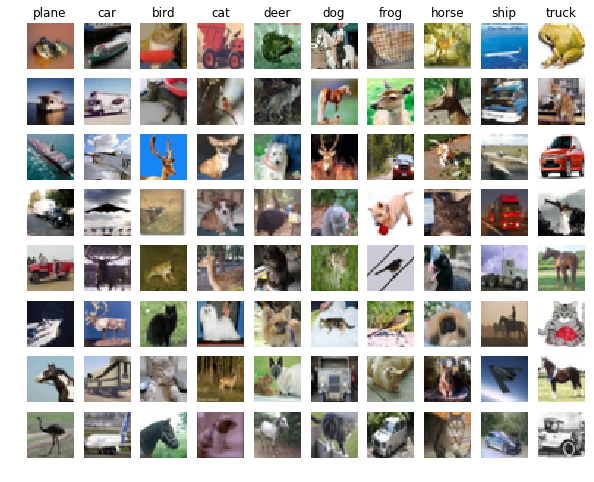

In [12]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [ ]:
print (X_train_feats.shape)

In [17]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
learning_rates = [1e-4, 1e-3, 1e-2]
regularization_factors = [10, 100, 1e3, 1e4, 1e5]
hidden_sizes = [50, 100, 150, 200]
epochs = [1000, 1500, 2000]
grid_search = [(lr, rf, hs, ep) for lr in learning_rates for rf in regularization_factors for hs in hidden_sizes for ep in epochs]
best_val_acc = -1

total_iter = len(grid_search)
idx = 1

for lr, rf, hs, ep in grid_search:

    input_size = input_dim # 32 * 32 * 3
    hidden_size = hs
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)

    print(idx, '/', total_iter)
    idx += 1
    
    # Train the network
    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                num_iters=ep, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=rf, verbose=False)

    # Predict on the validation set
    val_acc = (net.predict(X_val_feats) == y_val).mean()
    if val_acc > best_val_acc:
        best_net = net
        best_val_acc = val_acc
        print ('Found better validation accuracy: ', val_acc)
        print(lr, rf, hs, ep)
    
    
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

1 / 216
Found better validation accuracy:  0.112
0.0001 100 50 1000
2 / 216
3 / 216
4 / 216
Found better validation accuracy:  0.113
0.0001 100 100 1000
5 / 216
Found better validation accuracy:  0.119
0.0001 100 100 1500
6 / 216
7 / 216
8 / 216
9 / 216
10 / 216
11 / 216
12 / 216
13 / 216
14 / 216
15 / 216
16 / 216
17 / 216
18 / 216
19 / 216
20 / 216
21 / 216
22 / 216
23 / 216
24 / 216
25 / 216
26 / 216
27 / 216
28 / 216
29 / 216
30 / 216
31 / 216
32 / 216
33 / 216
34 / 216
35 / 216
36 / 216
37 / 216


/home/anand/store/git/anandsaha/cs231n.assignments/2016winter/assignment1/cs231n/classifiers/neural_net.py:100: RuntimeWarning: divide by zero encountered in log
  data_loss = -np.log(scores_normalized[np.arange(N), y])
/home/anand/store/git/anandsaha/cs231n.assignments/2016winter/assignment1/cs231n/classifiers/neural_net.py:102: RuntimeWarning: overflow encountered in double_scalars
  reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2)
/home/anand/store/git/anandsaha/cs231n.assignments/2016winter/assignment1/cs231n/classifiers/neural_net.py:96: RuntimeWarning: overflow encountered in subtract
  scores = scores - np.max(scores, axis=1).reshape((-1, 1))
/home/anand/store/git/anandsaha/cs231n.assignments/2016winter/assignment1/cs231n/classifiers/neural_net.py:96: RuntimeWarning: invalid value encountered in subtract
  scores = scores - np.max(scores, axis=1).reshape((-1, 1))


38 / 216
39 / 216
40 / 216
41 / 216
42 / 216
43 / 216
44 / 216
45 / 216
46 / 216
47 / 216
48 / 216
49 / 216


/home/anand/store/git/anandsaha/cs231n.assignments/2016winter/assignment1/cs231n/classifiers/neural_net.py:102: RuntimeWarning: overflow encountered in multiply
  reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2)


50 / 216
51 / 216
52 / 216
53 / 216
54 / 216
55 / 216
56 / 216
57 / 216
58 / 216
59 / 216
60 / 216
61 / 216
62 / 216
63 / 216
64 / 216
65 / 216
66 / 216
67 / 216
68 / 216
69 / 216
70 / 216
71 / 216
72 / 216
73 / 216
74 / 216
75 / 216
76 / 216
77 / 216
78 / 216
79 / 216
80 / 216
81 / 216
82 / 216
83 / 216
84 / 216
85 / 216
86 / 216
87 / 216
88 / 216
89 / 216
90 / 216
91 / 216
92 / 216
93 / 216
94 / 216
95 / 216
96 / 216
97 / 216
98 / 216
99 / 216
100 / 216
101 / 216
102 / 216
103 / 216
104 / 216
105 / 216
106 / 216
107 / 216
108 / 216
109 / 216
110 / 216
111 / 216
112 / 216
113 / 216
114 / 216
115 / 216
116 / 216
117 / 216
118 / 216
119 / 216
120 / 216
121 / 216
122 / 216
123 / 216
124 / 216
125 / 216
126 / 216
127 / 216
128 / 216
129 / 216
130 / 216
131 / 216
132 / 216
133 / 216
134 / 216
135 / 216
136 / 216
137 / 216
138 / 216
139 / 216
140 / 216
141 / 216
142 / 216
143 / 216
144 / 216
145 / 216
146 / 216
147 / 216
148 / 216
149 / 216
150 / 216
151 / 216
152 / 216
153 / 216
154 / 216


In [ ]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!